In [34]:
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show

import rasterio
from rasterio.vrt import WarpedVRT
from rasterio.windows import from_bounds
from rasterio.enums import Resampling

# exploration and sampling of rainfall data

Data from https://www.sciencebase.gov/catalog/item/620a80bdd34ec05caca60baf 

CRS: EPSG:5070
Bounds: BoundingBox(left=-5455995.0, bottom=-1038995.0, right=4080005.0, top=7387005.0)
Shape (rows, cols): 8426 9536
Number of bands: 1


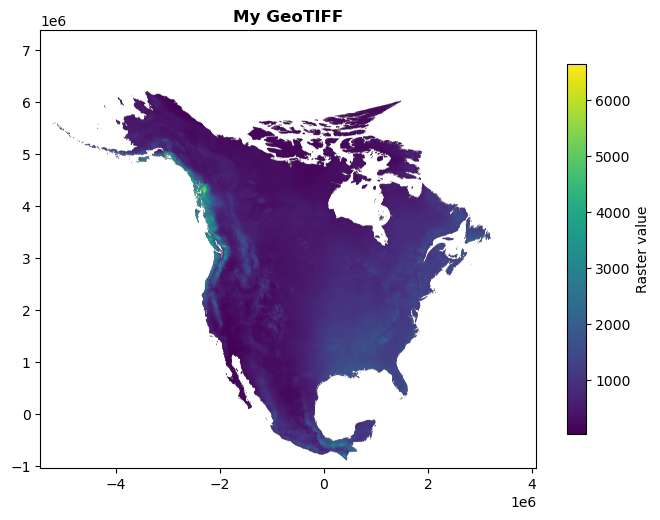

In [2]:
tif_path = "PPT9019.tif"

with rasterio.open(tif_path) as src:
    print("CRS:", src.crs)
    print("Bounds:", src.bounds)
    print("Shape (rows, cols):", src.height, src.width)
    print("Number of bands:", src.count)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    img = show(src, ax=ax, title="My GeoTIFF")
    cbar = plt.colorbar(img.get_images()[0], ax=ax, shrink=0.8)
    cbar.set_label("Raster value")
    plt.show()

# check new dataset

CRS: EPSG:5070
Bounds: BoundingBox(left=-3129667.0067249467, bottom=1557498.709176662, right=-1194667.0067249467, top=3322498.709176662)
Shape (rows, cols): 1765 1935
Number of bands: 1


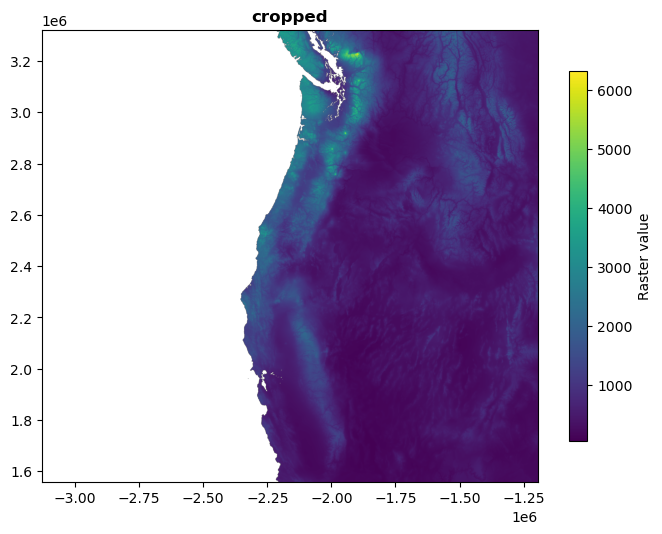

In [19]:
with rasterio.open(cropped_tif) as src:
    print("CRS:", src.crs)
    print("Bounds:", src.bounds)
    print("Shape (rows, cols):", src.height, src.width)
    print("Number of bands:", src.count)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    img = show(src, ax=ax, title="cropped")
    cbar = plt.colorbar(img.get_images()[0], ax=ax, shrink=0.8)
    cbar.set_label("Raster value")
    plt.show()

In [29]:
# --- Reproject to EPSG:4326 ---
dst_crs = "EPSG:4326"

proj_tif = "rainfall_cascadia_4326.tif"

with rasterio.open(in_tif) as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds
    )

    profile = src.profile.copy()
    profile.update({
        "crs": dst_crs,
        "transform": transform,
        "width": width,
        "height": height,
        "compress": "deflate",
        "predictor": 2,
        "tiled": True,
        "blockxsize": 512,
        "blockysize": 512,
    })

    with rasterio.open(proj_tif, "w", **profile) as dst:
        reproject(
            source=rasterio.band(src, 1),
            destination=rasterio.band(dst, 1),
            src_transform=src.transform,
            src_crs=src.crs,
            dst_transform=transform,
            dst_crs=dst_crs,
            resampling=Resampling.bilinear,
        )

print("Reprojected raster saved as:", proj_tif)

Reprojected raster saved as: rainfall_cascadia_4326.tif


CRS: EPSG:4326
Bounds: BoundingBox(left=-179.9999986027284, bottom=0.39346145168816804, right=179.99665222911676, top=90.0)
Shape (rows, cols): 5078 20401
Number of bands: 1


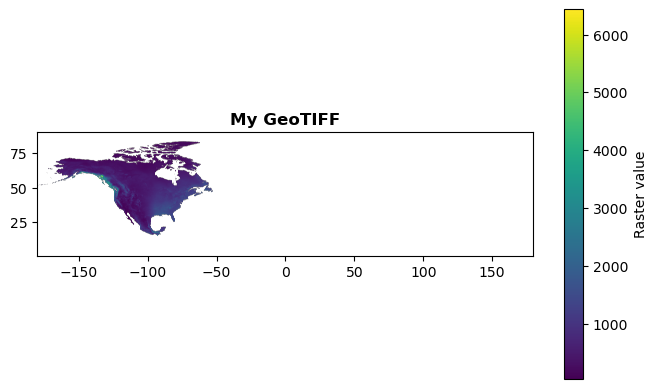

In [30]:
with rasterio.open(proj_tif) as src:
    print("CRS:", src.crs)
    print("Bounds:", src.bounds)
    print("Shape (rows, cols):", src.height, src.width)
    print("Number of bands:", src.count)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    img = show(src, ax=ax, title="My GeoTIFF")
    cbar = plt.colorbar(img.get_images()[0], ax=ax, shrink=0.8)
    cbar.set_label("Raster value")
    plt.show()

# Crop to cascadia only

In [32]:
in_tif  = "PPT9019.tif"        # EPSG:5070 (your file)
cropped_tif = "rainfall_cascadia_bbox_4326.tif"

bbox_ll = (-130.0, 32.0, -113.0, 52.0)   # (minx, miny, maxx, maxy) in EPSG:4326

from pyproj import Transformer
with rasterio.open(proj_tif) as src:
    window = from_bounds(*bbox_ll, transform=src.transform)
    data = src.read(1, window=window)
    out_transform = src.window_transform(window)

    profile = src.profile.copy()
    profile.update({
        "height": data.shape[0],
        "width":  data.shape[1],
        "transform": out_transform,
        "compress": "deflate",
        "predictor": 2,
        "tiled": True,
        "blockxsize": 512,
        "blockysize": 512,
    })

    with rasterio.open(cropped_tif, "w", **profile) as dst:
        dst.write(data, 1)

print("Wrote:", cropped_tif)

Wrote: rainfall_cascadia_bbox_4326.tif


CRS: EPSG:4326
Bounds: BoundingBox(left=-130.0, bottom=32.00704840976027, right=-113.0068734497786, top=51.99999999999999)
Shape (rows, cols): 1133 963
Number of bands: 1


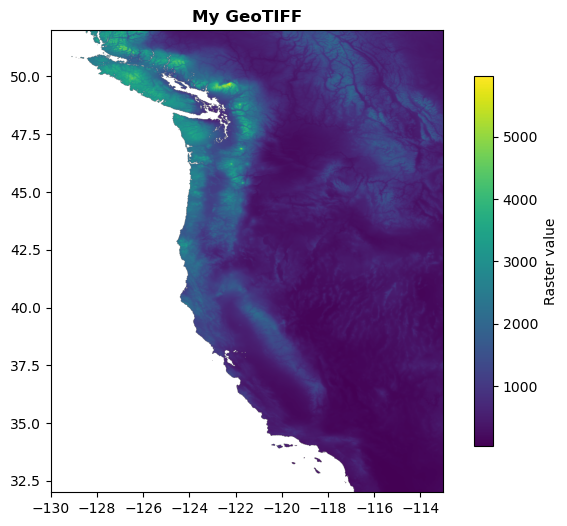

In [33]:
with rasterio.open(cropped_tif) as src:
    print("CRS:", src.crs)
    print("Bounds:", src.bounds)
    print("Shape (rows, cols):", src.height, src.width)
    print("Number of bands:", src.count)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    img = show(src, ax=ax, title="My GeoTIFF")
    cbar = plt.colorbar(img.get_images()[0], ax=ax, shrink=0.8)
    cbar.set_label("Raster value")
    plt.show()